In [1]:
import json 

with open('results/vrd/test_predict.json') as f:
    results = json.load(f)

50


In [8]:
pred_count = {k:[0,0] for k in pred_strs}
for res in results:
    for pred in res['pred_count']:
        pred_count[pred][0] += res['pred_count'][pred][0]
        pred_count[pred][1] += res['pred_count'][pred][1]

pred_strs = list(pred_count.keys())
print(len(pred_strs))

50


In [9]:
import numpy as np

pred_count_np = np.array(list(pred_count.values()))
print(np.sum(pred_count_np[:,0]))
print(np.sum(pred_count_np[:,1]))
idx = np.argsort(pred_count_np[:,1])
idx = idx[::-1]
display(idx)
pred_count_np = pred_count_np[idx]
pred_strs = np.array(pred_strs)[idx]

print([(pred_strs[i], pred_count_np[i,0], pred_count_np[i,1]) for i in idx])

74334
140828


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

[('on', 45175, 47300), ('has', 4626, 19414), ('of', 6710, 16006), ('wearing', 10178, 15076), ('in', 4500, 8225), ('near', 784, 6094), ('with', 6, 4470), ('behind', 964, 3947), ('holding', 444, 3227), ('wears', 0, 1783), ('above', 76, 1633), ('sitting on', 56, 1607), ('under', 124, 1372), ('riding', 175, 1118), ('in front of', 49, 1113), ('standing on', 47, 1038), ('attached to', 0, 653), ('belonging to', 0, 619), ('at', 67, 582), ('walking on', 178, 522), ('carrying', 30, 507), ('over', 0, 426), ('for', 19, 310), ('hanging from', 0, 309), ('watching', 3, 308), ('looking at', 0, 287), ('parked on', 21, 214), ('eating', 0, 211), ('laying on', 0, 207), ('between', 0, 198), ('and', 0, 189), ('covering', 0, 186), ('covered in', 102, 171), ('using', 0, 162), ('on back of', 0, 143), ('along', 0, 139), ('mounted on', 0, 137), ('to', 0, 128), ('part of', 0, 127), ('lying on', 0, 105), ('from', 0, 95), ('walking in', 0, 92), ('painted on', 0, 90), ('growing on', 0, 81), ('across', 0, 67), ('agai

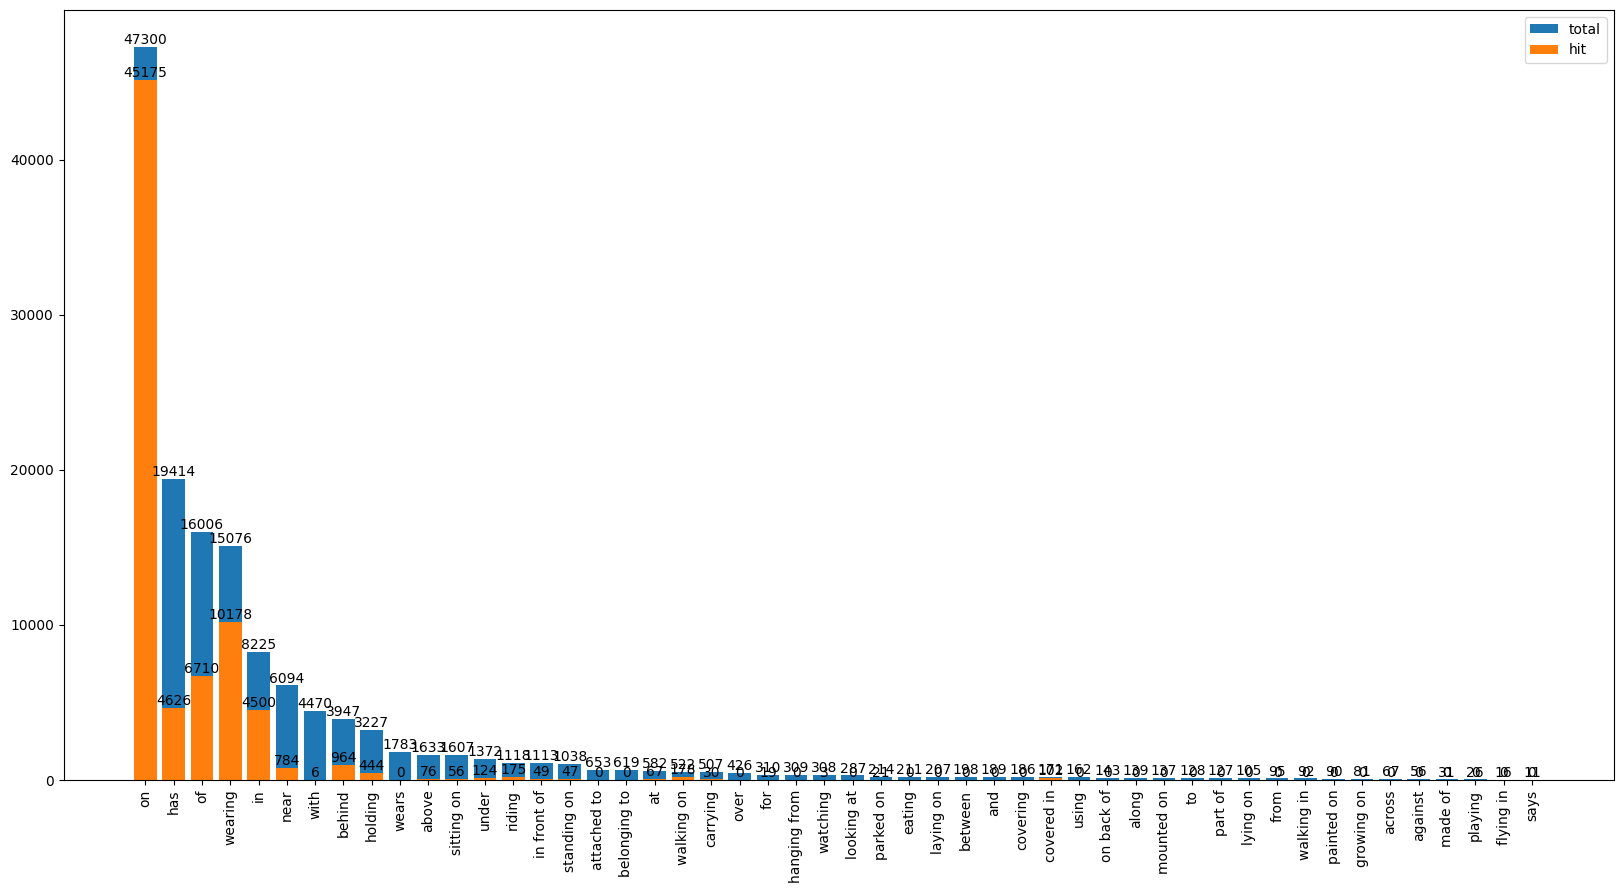

In [10]:
import matplotlib.pyplot as plt

# Plot histogram of relation hit count and total count
plt.figure(figsize=(20,10))
plt.bar(range(len(pred_count)), pred_count_np[:,1])
plt.bar(range(len(pred_count)), pred_count_np[:,0])
plt.legend(['total', 'hit'])
# add number labels
for i in range(len(pred_count)):
    plt.text(i, pred_count_np[i,1], str(pred_count_np[i,1]), ha='center', va='bottom')
    plt.text(i, pred_count_np[i,0], str(pred_count_np[i,0]), ha='center', va='bottom')
plt.xticks(range(len(pred_count)), [pred_strs[i] for i in idx], rotation=90)
plt.show()